# Exploring how to acquire and process various climate datasets

In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sb

from dea_tools.dask import create_local_dask_cluster

In [ ]:
# client = create_local_dask_cluster(return_client=True)

## Retrieving ANU climate data (1 km, unsure of quality, limited variables but easy to access and preprocessed into useful params)

In [2]:
Ta = xr.open_dataset('https://dapds00.nci.org.au/thredds/dodsC/gh70/ANUClimate/v2-0/stable/month/tavg').sel(time=slice('2000', '2022'))

In [3]:
precip = xr.open_dataset('https://dapds00.nci.org.au/thredds/dodsC/gh70/ANUClimate/v2-0/stable/month/rain').sel(time=slice('2000', '2022'))

In [4]:
fn = xr.open_dataset('https://dapds00.nci.org.au/thredds/dodsC/gh70/ANUClimate/v2-0/stable/month/srad').sel(time=slice('2000', '2022'))

In [10]:
vpd = xr.open_dataset('https://dapds00.nci.org.au/thredds/dodsC/gh70/ANUClimate/v2-0/stable/month/vpd').sel(time=slice('2000', '2022'))

## Retrieving BARRA data (12 km resolution over Aus)

In [2]:
year_month = '2018/01/'
out_folder= '/g/data/os22/chad_tmp/NEE_modelling/data/BARRA/'

### Soil Moisture

In [3]:
var = 'soil_mois'

In [8]:
base = '/g/data/cj37/BARRA/BARRA_R/v1/analysis/slv/'+var+'/'+year_month
files = os.listdir(base)

paths = [base+f for f in files]

ds = xr.open_mfdataset(paths=paths,
                 chunks={},
                 engine='netcdf4',
                 concat_dim='time',
                 combine='nested',
                 ).sortby('time')
# ds
ds = ds[var].mean('depth').mean('time').isel(latitude=slice(190,500), longitude=slice(400,850)).compute()
ds.to_netcdf(out_folder+'sm.nc')

,Array,Chunk
Bytes,7.94 kB,64 B
Shape,"(124, 4, 2)","(1, 4, 2)"
Count,620 Tasks,124 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,1.83 GB,14.75 MB
Shape,"(124, 4, 768, 1200)","(1, 4, 768, 1200)"
Count,620 Tasks,124 Chunks
Type,float32,numpy.ndarray


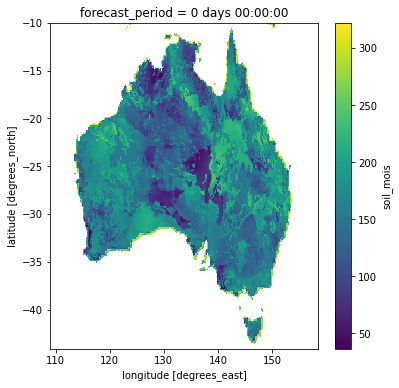

In [5]:
ds.plot.imshow(figsize=(6,6));

### Precip

In [ ]:
var = 'vis_precip'

In [ ]:
base = '/g/data/cj37/BARRA/BARRA_R/v1/analysis/slv/'+var+'/'+year_month
files = os.listdir(base)

paths = [base+f for f in files]

ds = xr.open_mfdataset(paths=paths,
                 chunks={},
                 engine='netcdf4',
                 concat_dim='time',
                 combine='nested',
                 ).sortby('time')

ds = ds[var].mean('time').isel(latitude=slice(190,500), longitude=slice(400,850)).compute()
ds.to_netcdf(out_folder+'precip.nc')

In [ ]:
ds.plot.imshow(figsize=(6,6));

### Net solar radiation

In [ ]:
var = 'av_netlwsfc'
var1 = 'av_netswsfc'

#### Net Long wave

In [ ]:
base = '/g/data/cj37/BARRA/BARRA_R/v1/analysis/slv/'+var+'/'+year_month
files = os.listdir(base)

paths = [base+f for f in files]

ds_lw = xr.open_mfdataset(paths=paths,
                 chunks={},
                 engine='netcdf4',
                 concat_dim='time',
                 combine='nested',
                 ).sortby('time')

ds_lw = ds_lw[var].mean('time').isel(latitude=slice(190,500), longitude=slice(400,850)).compute()

#### Net short wave

In [ ]:
base = '/g/data/cj37/BARRA/BARRA_R/v1/analysis/slv/'+var1+'/'+year_month
files = os.listdir(base)

paths = [base+f for f in files]

ds_sw = xr.open_mfdataset(paths=paths,
                 chunks={},
                 engine='netcdf4',
                 concat_dim='time',
                 combine='nested',
                 ).sortby('time')

ds_sw = ds_sw[var1].mean('time').isel(latitude=slice(190,500), longitude=slice(400,850)).compute()

In [ ]:
ds = ds_sw + ds_lw
ds.to_netcdf(out_folder+'fn.nc')

In [ ]:
ds.plot.imshow(figsize=(6,6));

### Air temp

In [ ]:
var = 'av_temp_scrn'

In [ ]:
base = '/g/data/cj37/BARRA/BARRA_R/v1/analysis/slv/'+var+'/'+year_month
files = os.listdir(base)

paths = [base+f for f in files]

ds = xr.open_mfdataset(paths=paths,
                 chunks={},
                 engine='netcdf4',
                 concat_dim='time',
                 combine='nested',
                 ).sortby('time')

ds = ds[var].mean('time').isel(latitude=slice(190,500), longitude=slice(400,850)).compute()
ds.to_netcdf(out_folder+'Ta.nc')

In [ ]:
ds.plot.imshow(figsize=(6,6));

### Relative humidity (calculated from dewpoint and Ta)

In [ ]:
var = 'dewpt_scrn'

In [ ]:
base = '/g/data/cj37/BARRA/BARRA_R/v1/analysis/slv/'+var+'/'+year_month
files = os.listdir(base)

paths = [base+f for f in files]

ds = xr.open_mfdataset(paths=paths,
                 chunks={},
                 engine='netcdf4',
                 concat_dim='time',
                 combine='nested',
                 ).sortby('time')

ds = ds[var].mean('time').isel(latitude=slice(190,500), longitude=slice(400,850)).compute()
ds.to_netcdf(out_folder+'dewpt.nc')

#open Ta
Ta = xr.open_dataarray(out_folder+'Ta.nc')
rh = 100*(xr.ufuncs.exp((17.625*ds)/(243.04+ds))/xr.ufuncs.exp((17.625*Ta)/(243.04+Ta)))
rh.to_netcdf(out_folder+'rh.nc')

In [ ]:
rh.plot.imshow(figsize=(6,6));

### Vapour Pressure Deficit

In [ ]:
def VPD(rh, ta):
    sat_vp = (6.11 * xr.ufuncs.exp((2500000/461) * (1/273 - 1/(273 + ta))))
    vpd = (((100 - rh)/100) * sat_vp)
    return vpd / 10 # go from mb to kPA

In [ ]:
Ta = xr.open_dataarray(out_folder+'Ta.nc')
Ta=Ta-273.15 #to celsius
rh = xr.open_dataarray(out_folder+'rh.nc')

vpd = VPD(rh,Ta)

In [ ]:
vpd.to_netcdf(out_folder+'vpd.nc')